In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('vgsales.csv', index_col = 0)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


In [3]:
df.info

<bound method DataFrame.info of                                                    Name Platform    Year  \
Rank                                                                       
1                                            Wii Sports      Wii  2006.0   
2                                     Super Mario Bros.      NES  1985.0   
3                                        Mario Kart Wii      Wii  2008.0   
4                                     Wii Sports Resort      Wii  2009.0   
5                              Pokemon Red/Pokemon Blue       GB  1996.0   
...                                                 ...      ...     ...   
16596                Woody Woodpecker in Crazy Castle 5      GBA  2002.0   
16597                     Men in Black II: Alien Escape       GC  2003.0   
16598  SCORE International Baja 1000: The Official Game      PS2  2008.0   
16599                                        Know How 2       DS  2010.0   
16600                                  Spirits & Spells 

## Context of Data

* This data is scraped from https://www.vgchartz.com
* Game titles are split by platforms
* PC Games and sales are excluded from data
    * These are console-based sales
* Sales are in terms of millions of copies sold

### This also excludes free-to-play games

    Even though free-to-play games tend to be the most popular or most downloaded, since there are no "official" sales, they are excluded

    Some of the most popular tend to be Fortite, Valorant, League of Legends, Apex Legends, and many more.

## Removing irrelevant/unpopular platforms

I am keeping consoles that I have interacted with during my lifetime (I was born in 1998).

In [4]:
list = ['TG16','SCD','PCFX','NG','3DO','WS','7800','DC','SAT','GG','2600','GEN','NES','SNES']

df= df[~df['Platform'].isin(list)]

# Genre

## Let's see which type of genre has sold the most copies

In [5]:
GenreSales = df.groupby(by = 'Genre')['Global_Sales'].sum().reset_index()
GenreSales.sort_values('Global_Sales', ascending=False,inplace=True)
GenreSales.set_index('Genre',inplace=True)
GenreSales

,Global_Sales
Genre,
Action,1678.36
Sports,1273.11
Shooter,964.74
Role-Playing,866.14
Misc,796.44
Racing,700.48
Platform,636.38
Fighting,396.51
Simulation,384.45


<AxesSubplot:xlabel='Genre', ylabel='Global_Sales'>

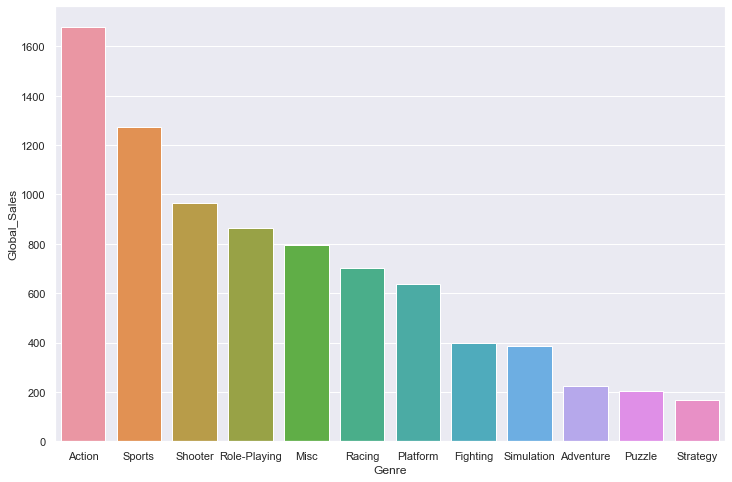

In [6]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data= GenreSales, x= GenreSales.index, y= 'Global_Sales')

## Let's see if certain platforms are correlated with certain genres

In [7]:
GenrePlat = df.groupby(by = ['Genre','Platform']).size().reset_index(name='Count')
GenrePlat.sort_values('Count',ascending=False,inplace=True)
GenrePlat.reset_index()

,index,Genre,Platform,Count
0,186,Sports,PS2,400
1,54,Misc,DS,393
2,9,Action,PS3,380
3,8,Action,PS2,348
4,1,Action,DS,343
...,...,...,...,...
209,213,Strategy,XOne,3
210,108,Racing,GB,2
211,99,Puzzle,PS4,1
212,174,Simulation,WiiU,1


### Top 10 most correlated Genres and Platforms

In [8]:
GenrePlat.head(10)

,Genre,Platform,Count
186,Sports,PS2,400
54,Misc,DS,393
9,Action,PS3,380
8,Action,PS2,348
1,Action,DS,343
15,Action,X360,324
161,Simulation,DS,285
66,Misc,Wii,280
191,Sports,Wii,261
19,Adventure,DS,240


### Top 10 least correlated Genres and Platforms

In [9]:
GenrePlat.tail(10)

,Genre,Platform,Count
172,Simulation,PSV,3
120,Racing,WiiU,3
101,Puzzle,PSV,3
32,Adventure,WiiU,3
177,Simulation,XOne,3
213,Strategy,XOne,3
108,Racing,GB,2
99,Puzzle,PS4,1
174,Simulation,WiiU,1
144,Shooter,GB,1


### Visualization of genre-platform combinations

In [12]:
pivGenrePlat = GenrePlat.pivot_table(index='Genre',columns='Platform', values='Count')
pivGenrePlat.fillna(0,inplace=True)
pivGenrePlat

Platform,3DS,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,
Action,182.0,343.0,6.0,167.0,101.0,38.0,165.0,157.0,348.0,380.0,122.0,222.0,142.0,238.0,63.0,324.0,155.0,68.0
Adventure,37.0,240.0,5.0,38.0,20.0,4.0,65.0,69.0,196.0,74.0,19.0,213.0,86.0,84.0,3.0,47.0,26.0,12.0
Fighting,14.0,36.0,0.0,23.0,42.0,29.0,6.0,108.0,150.0,76.0,17.0,74.0,16.0,42.0,5.0,65.0,48.0,7.0
Misc,53.0,393.0,8.0,110.0,36.0,18.0,24.0,76.0,222.0,124.0,15.0,106.0,24.0,280.0,21.0,126.0,46.0,15.0
Platform,28.0,92.0,19.0,142.0,73.0,30.0,11.0,64.0,103.0,37.0,11.0,36.0,10.0,58.0,16.0,24.0,49.0,4.0
Puzzle,20.0,238.0,15.0,41.0,13.0,12.0,25.0,32.0,18.0,3.0,1.0,44.0,3.0,55.0,4.0,7.0,7.0,0.0
Racing,11.0,67.0,2.0,64.0,63.0,57.0,60.0,145.0,216.0,92.0,17.0,65.0,11.0,94.0,3.0,105.0,123.0,19.0
Role-Playing,86.0,200.0,21.0,73.0,27.0,8.0,104.0,97.0,187.0,119.0,47.0,192.0,83.0,35.0,6.0,76.0,23.0,13.0
Shooter,7.0,42.0,1.0,40.0,48.0,24.0,148.0,96.0,160.0,156.0,34.0,37.0,5.0,66.0,10.0,203.0,132.0,33.0


<AxesSubplot:xlabel='Platform', ylabel='Genre'>

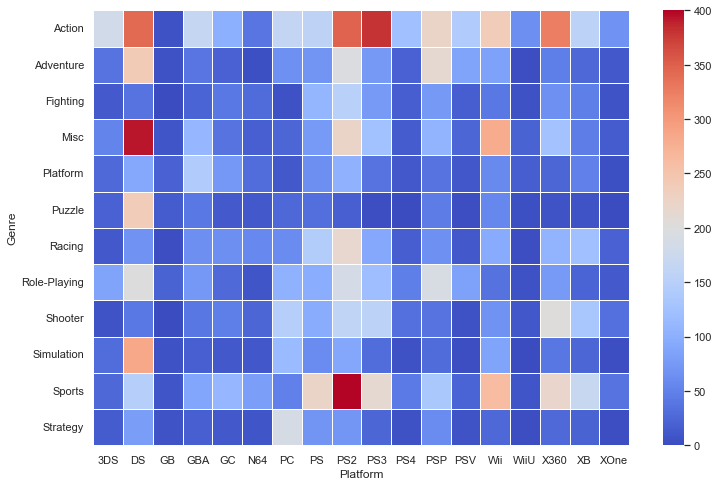

In [13]:
sns.heatmap(pivGenrePlat,cmap='coolwarm',linecolor='white',linewidths=1)

### Let's find popularity of Genre per platform (normalize with total amount of games made per platform)

In [14]:
normalpivGenrePlat = pivGenrePlat.copy()

for column in normalpivGenrePlat:
    normalpivGenrePlat[column] = ((normalpivGenrePlat[column]/normalpivGenrePlat[column].sum())*100).round(1)

#### Percent of Genres made for each platform

In [17]:
normalpivGenrePlat

Platform,3DS,DS,GB,GBA,GC,N64,PC,PS,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XB,XOne
Genre,,,,,,,,,,,,,,,,,,
Action,35.8,15.9,6.1,20.3,18.2,11.9,17.2,13.1,16.1,28.6,36.3,18.3,34.4,18.0,44.1,25.6,18.8,31.9
Adventure,7.3,11.1,5.1,4.6,3.6,1.3,6.8,5.8,9.1,5.6,5.7,17.6,20.8,6.3,2.1,3.7,3.2,5.6
Fighting,2.8,1.7,0.0,2.8,7.6,9.1,0.6,9.0,6.9,5.7,5.1,6.1,3.9,3.2,3.5,5.1,5.8,3.3
Misc,10.4,18.2,8.2,13.4,6.5,5.6,2.5,6.4,10.3,9.3,4.5,8.7,5.8,21.1,14.7,10.0,5.6,7.0
Platform,5.5,4.3,19.4,17.3,13.1,9.4,1.1,5.4,4.8,2.8,3.3,3.0,2.4,4.4,11.2,1.9,5.9,1.9
Puzzle,3.9,11.0,15.3,5.0,2.3,3.8,2.6,2.7,0.8,0.2,0.3,3.6,0.7,4.2,2.8,0.6,0.8,0.0
Racing,2.2,3.1,2.0,7.8,11.3,17.9,6.2,12.1,10.0,6.9,5.1,5.4,2.7,7.1,2.1,8.3,14.9,8.9
Role-Playing,16.9,9.2,21.4,8.9,4.9,2.5,10.8,8.1,8.7,9.0,14.0,15.8,20.1,2.6,4.2,6.0,2.8,6.1
Shooter,1.4,1.9,1.0,4.9,8.6,7.5,15.4,8.0,7.4,11.7,10.1,3.1,1.2,5.0,7.0,16.0,16.0,15.5


## Platform sales

In [19]:
PlatSales = df.groupby(by = 'Platform')['Global_Sales'].sum().reset_index()
PlatSales.sort_values('Global_Sales', ascending=False,inplace=True)
PlatSales.set_index('Platform',inplace=True)
PlatSales

,Global_Sales
Platform,
PS2,1255.64
X360,979.96
PS3,957.84
Wii,926.71
DS,822.49
PS,730.66
GBA,318.50
PSP,296.28
PS4,278.10


<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

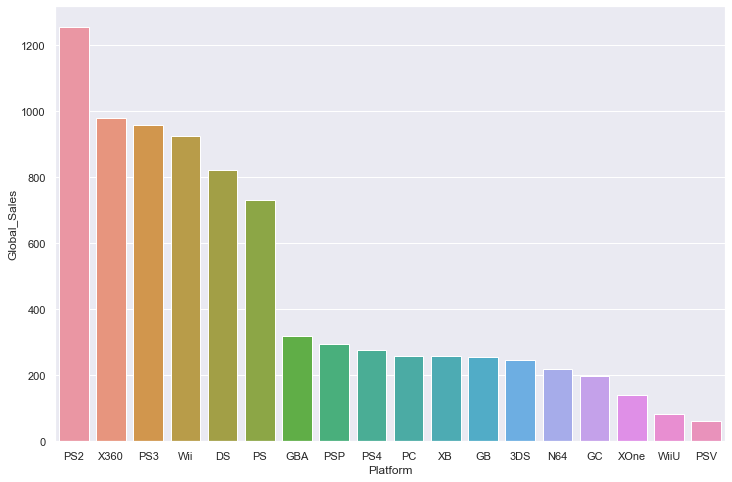

In [32]:
sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data= PlatSales, x= PlatSales.index, y= 'Global_Sales')

## Global Sales by Platform and Genre

<AxesSubplot:xlabel='Platform', ylabel='Global_Sales'>

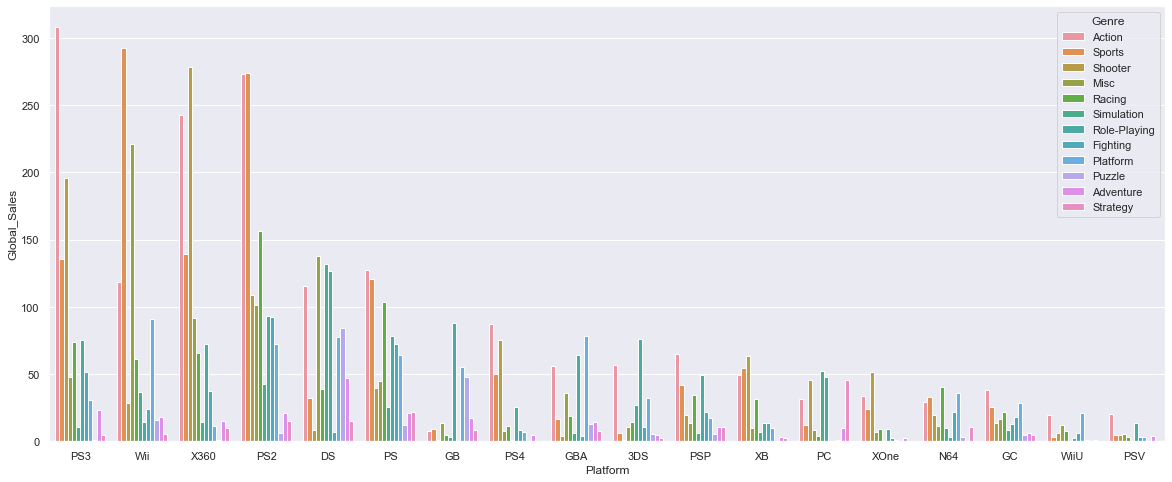

In [33]:
GenrePlatSales = df.groupby(by = ['Genre','Platform'])['Global_Sales'].sum().reset_index()
GenrePlatSales.sort_values('Global_Sales', ascending=False,inplace=True)
GenrePlatSales.set_index('Genre',inplace=True)
GenrePlatSales

sns.set(rc={'figure.figsize':(20,8)})
sns.barplot(data= GenrePlatSales, hue= GenrePlatSales.index, y= 'Global_Sales',x='Platform')

## Global Sales by Publisher

In [46]:
PubSales = df.groupby(by = ['Publisher'])['Global_Sales'].sum().reset_index()
PubSales.sort_values('Global_Sales', ascending=False,inplace=True)
PubSales.set_index('Publisher',inplace=True)
PubSales = PubSales.iloc[:20]

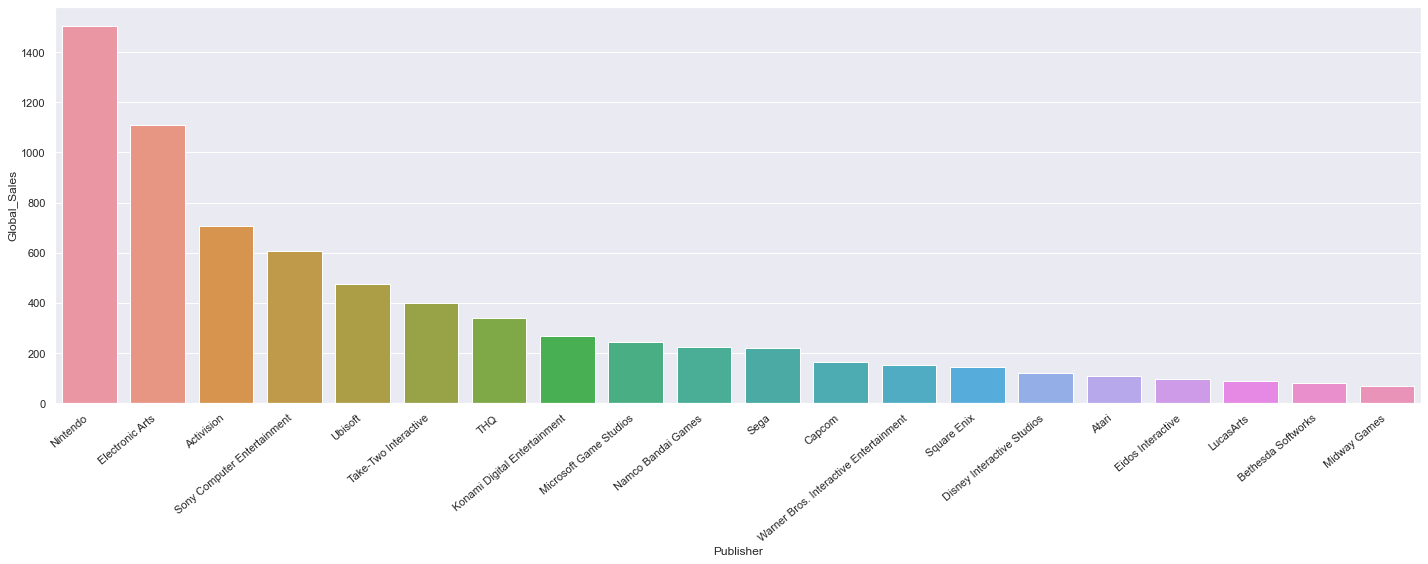

In [45]:
sns.set(rc={'figure.figsize':(20,8)})
ax = sns.barplot(data= PubSales, x= PubSales.index, y= 'Global_Sales')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

## Global Sales make-up by region

In [47]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [70]:
df2=df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
df2 = pd.DataFrame(df2)
df2 = ((df2/df2.loc['Global_Sales'])*100).round(1)
df2.drop('Global_Sales',inplace=True)
df2

,0
NA_Sales,49.3
EU_Sales,28.7
JP_Sales,12.4
Other_Sales,9.5


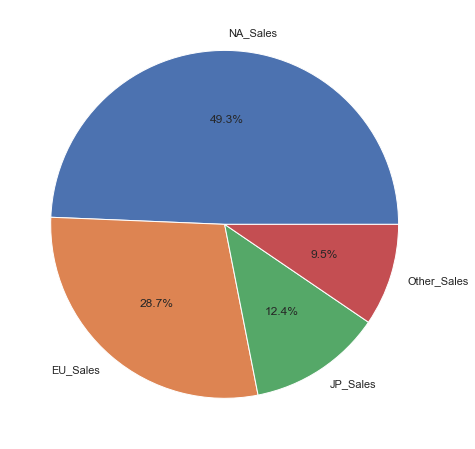

In [78]:
plt.figure()
plt.pie(df2[0],labels=df2.index,autopct='%1.1f%%')

plt.show()